In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [9]:
import splitfolders
input_folder = r"C:\Users\Young\Desktop\DeepLearning\NonsegmentedV2"


In [3]:
splitfolders.ratio(input_folder, output="test_4", 
                   seed=42, ratio=(.600, .240, .160),
                  group_prefix=None)

Copying files: 5539 files [00:07, 736.26 files/s]


In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255 ,
                                 shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)



In [11]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Young\Desktop\DeepLearning\test_4\train" ,
                                                target_size = (64,64) ,
                                                batch_size = 32 ,
                                                class_mode = 'categorical')


Found 3318 images belonging to 12 classes.


In [12]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Young\Desktop\DeepLearning\test_4\val" ,
                                                target_size = (64,64) ,
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1324 images belonging to 12 classes.


In [34]:
model = Sequential()
#layer1
#conv layer 1
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (64,64,3)))
#pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#layer 2
#conv layer 2
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu' , input_shape = (14,14,6)))
#pooling layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#flatten
model.add(Flatten())

#layer 3
#fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))

#layer 4
#fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))

#layer 5
#output layer
model.add(Dense(units = 12, activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, steps_per_epoch = 100, epochs = 60 ,validation_data = test_set,validation_steps = 30)


Epoch 1/60
100/100 [==============================] - 8s 77ms/step - loss: 2.1786 - accuracy: 0.2480 - val_loss: 1.7983 - val_accuracy: 0.3594
Epoch 2/60
100/100 [==============================] - 10s 100ms/step - loss: 1.6862 - accuracy: 0.3978 - val_loss: 1.5490 - val_accuracy: 0.4344
Epoch 3/60
100/100 [==============================] - 12s 117ms/step - loss: 1.5471 - accuracy: 0.4455 - val_loss: 1.4586 - val_accuracy: 0.4740
Epoch 4/60
100/100 [==============================] - 11s 112ms/step - loss: 1.4303 - accuracy: 0.4887 - val_loss: 1.3754 - val_accuracy: 0.5208
Epoch 5/60
100/100 [==============================] - 11s 105ms/step - loss: 1.2878 - accuracy: 0.5473 - val_loss: 1.2790 - val_accuracy: 0.5427
Epoch 6/60
100/100 [==============================] - 10s 102ms/step - loss: 1.1506 - accuracy: 0.5934 - val_loss: 1.1655 - val_accuracy: 0.5906
Epoch 7/60
100/100 [==============================] - 11s 111ms/step - loss: 1.0500 - accuracy: 0.6276 - val_loss: 1.1245 - val_accu

100/100 [==============================] - 12s 120ms/step - loss: 0.1717 - accuracy: 0.9335 - val_loss: 0.8843 - val_accuracy: 0.7688
Epoch 58/60
100/100 [==============================] - 12s 121ms/step - loss: 0.1565 - accuracy: 0.9386 - val_loss: 0.9449 - val_accuracy: 0.7729
Epoch 59/60
100/100 [==============================] - 11s 110ms/step - loss: 0.1745 - accuracy: 0.9367 - val_loss: 0.9408 - val_accuracy: 0.7740
Epoch 60/60
100/100 [==============================] - 11s 112ms/step - loss: 0.1761 - accuracy: 0.9323 - val_loss: 0.9973 - val_accuracy: 0.7542


In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [15]:
model.save(r"C:\Users\Young\Desktop\DeepLearning\lenet\model.h5")
print("Saved")

Saved


In [36]:
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf

In [37]:
classifier = load_model(r"C:\Users\Young\Desktop\DeepLearning\lenet\model.h5")

In [38]:
ids = []
preds = []
from glob import glob
path = r'C:\Users\Young\Desktop\DeepLearning\test_4\test\*.png'
files = glob(path)
for i in files:
    id = i.split('\\')[-1]
    ids.append(id)
    test_image = tf.keras.utils.load_img(i, target_size = (64,64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    print(id)
    if result[0][0]==1.0:
        prediction = 'Black-grass'
        print(prediction)
    elif result[0][1]==1.0:
        prediction = 'Charlock'
        print(prediction)
    elif result[0][2]==1.0:
        prediction = 'Cleavers'
        print(prediction)
    elif result[0][3]==1.0:
        prediction = 'Common Chickweed'
        print(prediction)
    elif result[0][4]==1.0:
        prediction = 'Common wheat'
        print(prediction)
    elif result[0][5]==1.0:
        prediction = 'Fat Hen'
        print(prediction)
    elif result[0][6]==1.0:
        prediction = 'Loose Silky-bent'
        print(prediction)
    elif result[0][7]==1.0:
        prediction = 'Maize'
        print(prediction)
    elif result[0][8]==1.0:
        prediction = 'Scentless Mayweed'
        print(prediction)
    elif result[0][9]==1.0:
        prediction = 'Shepherds Purse'
        print(prediction)
    elif result[0][10]==1.0:
        prediction = 'Small-flowered Cranesbill'
        print(prediction)
    else:
        prediction = 'Sugar beet'
        print(prediction)
    preds.append(prediction)
        
    
            
    

1/1 [==============================] - 0s 97ms/step
 000.png
Maize
1/1 [==============================] - 0s 24ms/step
 001.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 002.png
Maize
1/1 [==============================] - 0s 24ms/step
 003.png
Sugar beet
1/1 [==============================] - 0s 23ms/step
 004.png
Charlock
1/1 [==============================] - 0s 23ms/step
 005.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 006.png
Fat Hen
1/1 [==============================] - 0s 23ms/step
 007.png
Black-grass
1/1 [==============================] - 0s 23ms/step
 008.png
Sugar beet
1/1 [==============================] - 0s 24ms/step
 009.png
Common Chickweed
1/1 [==============================] - 0s 23ms/step
 010.png
Charlock
1/1 [==============================] - 0s 24ms/step
 011.png
Maize
1/1 [==============================] - 0s 24ms/step
 012.png
Sugar beet
1/1 [==============================] - 0s 26ms/step
 013.png
Charlo

 111.png
Black-grass
1/1 [==============================] - 0s 25ms/step
 112.png
Maize
1/1 [==============================] - 0s 25ms/step
 113.png
Charlock
1/1 [==============================] - 0s 25ms/step
 114.png
Shepherds Purse
1/1 [==============================] - 0s 27ms/step
 115.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 27ms/step
 116.png
Common Chickweed
1/1 [==============================] - 0s 28ms/step
 117.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 24ms/step
 118.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 119.png
Sugar beet
1/1 [==============================] - 0s 23ms/step
 120.png
Black-grass
1/1 [==============================] - 0s 24ms/step
 121.png
Scentless Mayweed
1/1 [==============================] - 0s 25ms/step
 122.png
Common Chickweed
1/1 [==============================] - 0s 23ms/step
 123.png
Common Chickweed
1/1 [==============================] - 0s 27ms/step
 12

1/1 [==============================] - 0s 27ms/step
 223.png
Charlock
1/1 [==============================] - 0s 26ms/step
 224.png
Charlock
1/1 [==============================] - 0s 25ms/step
 225.png
Common Chickweed
1/1 [==============================] - 0s 29ms/step
 226.png
Charlock
1/1 [==============================] - 0s 25ms/step
 227.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 26ms/step
 228.png
Maize
1/1 [==============================] - 0s 28ms/step
 229.png
Charlock
1/1 [==============================] - 0s 26ms/step
 230.png
Black-grass
1/1 [==============================] - 0s 24ms/step
 231.png
Maize
1/1 [==============================] - 0s 27ms/step
 232.png
Maize
1/1 [==============================] - 0s 25ms/step
 233.png
Common Chickweed
1/1 [==============================] - 0s 29ms/step
 234.png
Charlock
1/1 [==============================] - 0s 24ms/step
 235.png
Black-grass
1/1 [==============================] - 0s 24ms/step
 236.png

1/1 [==============================] - 0s 24ms/step
 335.png
Black-grass
1/1 [==============================] - 0s 26ms/step
 336.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 26ms/step
 337.png
Charlock
1/1 [==============================] - 0s 26ms/step
 338.png
Fat Hen
1/1 [==============================] - 0s 27ms/step
 339.png
Charlock
1/1 [==============================] - 0s 25ms/step
 340.png
Common Chickweed
1/1 [==============================] - 0s 25ms/step
 341.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 342.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 24ms/step
 343.png
Maize
1/1 [==============================] - 0s 24ms/step
 344.png
Maize
1/1 [==============================] - 0s 23ms/step
 345.png
Charlock
1/1 [==============================] - 0s 23ms/step
 346.png
Maize
1/1 [==============================] - 0s 24ms/step
 347.png
Black-grass
1/1 [==============================] - 0s 23

1/1 [==============================] - 0s 32ms/step
 445.png
Fat Hen
1/1 [==============================] - 0s 29ms/step
 446.png
Black-grass
1/1 [==============================] - 0s 29ms/step
 447.png
Common Chickweed
1/1 [==============================] - 0s 31ms/step
 448.png
Maize
1/1 [==============================] - 0s 28ms/step
 449.png
Common Chickweed
1/1 [==============================] - 0s 27ms/step
 450.png
Maize
1/1 [==============================] - 0s 27ms/step
 451.png
Charlock
1/1 [==============================] - 0s 31ms/step
 452.png
Common Chickweed
1/1 [==============================] - 0s 31ms/step
 453.png
Sugar beet
1/1 [==============================] - 0s 32ms/step
 454.png
Charlock
1/1 [==============================] - 0s 28ms/step
 455.png
Common Chickweed
1/1 [==============================] - 0s 27ms/step
 456.png
Charlock
1/1 [==============================] - 0s 26ms/step
 457.png
Common Chickweed
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step
 555.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 28ms/step
 556.png
Charlock
1/1 [==============================] - 0s 32ms/step
 557.png
Maize
1/1 [==============================] - 0s 35ms/step
 558.png
Sugar beet
1/1 [==============================] - 0s 29ms/step
 559.png
Charlock
1/1 [==============================] - 0s 29ms/step
 560.png
Common Chickweed
1/1 [==============================] - 0s 36ms/step
 561.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 39ms/step
 562.png
Fat Hen
1/1 [==============================] - 0s 31ms/step
 563.png
Common Chickweed
1/1 [==============================] - 0s 84ms/step
 564.png
Charlock
1/1 [==============================] - 0s 35ms/step
 565.png
Sugar beet
1/1 [==============================] - 0s 36ms/step
 566.png
Sugar beet
1/1 [==============================] - 0s 36ms/step
 567.png
Charlock
1/1 [==============================] -

1/1 [==============================] - 0s 23ms/step
 664.png
Fat Hen
1/1 [==============================] - 0s 24ms/step
 665.png
Fat Hen
1/1 [==============================] - 0s 28ms/step
 666.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 25ms/step
 667.png
Black-grass
1/1 [==============================] - 0s 25ms/step
 668.png
Black-grass
1/1 [==============================] - 0s 28ms/step
 669.png
Black-grass
1/1 [==============================] - 0s 25ms/step
 670.png
Maize
1/1 [==============================] - 0s 25ms/step
 671.png
Common Chickweed
1/1 [==============================] - 0s 28ms/step
 672.png
Charlock
1/1 [==============================] - 0s 24ms/step
 673.png
Fat Hen
1/1 [==============================] - 0s 23ms/step
 674.png
Common Chickweed
1/1 [==============================] - 0s 26ms/step
 675.png
Common Chickweed
1/1 [==============================] - 0s 23ms/step
 676.png
Common Chickweed
1/1 [==============================] -

1/1 [==============================] - 0s 25ms/step
 771.png
Common Chickweed
1/1 [==============================] - 0s 26ms/step
 772.png
Black-grass
1/1 [==============================] - 0s 22ms/step
 773.png
Sugar beet
1/1 [==============================] - 0s 24ms/step
 774.png
Charlock
1/1 [==============================] - 0s 27ms/step
 775.png
Common Chickweed
1/1 [==============================] - 0s 25ms/step
 776.png
Maize
1/1 [==============================] - 0s 25ms/step
 777.png
Black-grass
1/1 [==============================] - 0s 27ms/step
 778.png
Common Chickweed
1/1 [==============================] - 0s 24ms/step
 779.png
Fat Hen
1/1 [==============================] - 0s 27ms/step
 780.png
Common Chickweed
1/1 [==============================] - 0s 25ms/step
 781.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 24ms/step
 782.png
Charlock
1/1 [==============================] - 0s 23ms/step
 783.png
Common Chickweed
1/1 [========================

1/1 [==============================] - 0s 25ms/step
 881.png
Scentless Mayweed
1/1 [==============================] - 0s 27ms/step
 882.png
Small-flowered Cranesbill
1/1 [==============================] - 0s 26ms/step
 883.png
Maize
1/1 [==============================] - 0s 26ms/step
 884.png
Charlock
1/1 [==============================] - 0s 25ms/step
 885.png
Maize
1/1 [==============================] - 0s 25ms/step
 886.png
Black-grass
1/1 [==============================] - 0s 25ms/step
 887.png
Maize
1/1 [==============================] - 0s 25ms/step
 888.png
Charlock
1/1 [==============================] - 0s 24ms/step
 889.png
Black-grass
1/1 [==============================] - 0s 25ms/step
 890.png
Common Chickweed
1/1 [==============================] - 0s 25ms/step
 891.png
Sugar beet
1/1 [==============================] - 0s 25ms/step
 892.png
Sugar beet
1/1 [==============================] - 0s 29ms/step
 893.png
Sugar beet
1/1 [==============================] - 0s 28ms/step
 

In [39]:
len(ids)
len(preds)


900

In [40]:
PS = {'file' : ids, 'species' : preds}
PS = pd.DataFrame(PS)
PS.to_csv('predictions.csv')

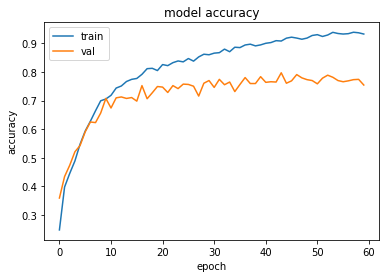

In [41]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

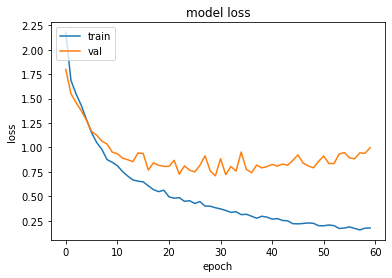

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

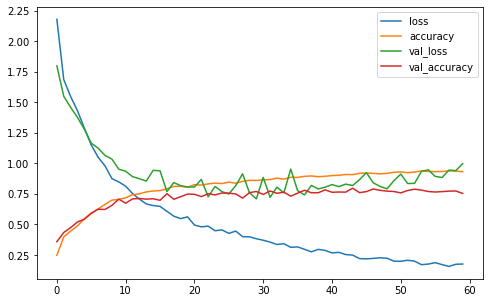

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()